## Functions
If you don't create a function, you have to recreate the code every time you want to use it. That's not very helpful.

In [1]:
lst1 = [1,2,3,4,5]
lst2 = [i * 2 for i in range(1,6)]
total = 0
for val in lst1:
    total = total + val
    print("val:", val, "total:", total)

print("total of values from lst1:", total)
print("lst2:", lst2)

total = 0
for val in lst2:
    total = total + val
    print("val:", val, "total:", total)
print("total of values from lst2:", total)

val: 1 total: 1
val: 2 total: 3
val: 3 total: 6
val: 4 total: 10
val: 5 total: 15
total of values from lst1: 15
lst2: [2, 4, 6, 8, 10]
val: 2 total: 2
val: 4 total: 6
val: 6 total: 12
val: 8 total: 20
val: 10 total: 30
total of values from lst2: 30


Building a function allows us to reuse the code without rebuilding it.

In [7]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    #for i in range(n):
    #    val = list_obj[i]
    #    total += val
    for val in list_obj:
        #total += val
        total = total + val
    # return outputs whatever value or variable is after return
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    # order list by value from smallest to greatest
    list_obj = sorted(list_obj)
    # if the list is not even
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # take the average of the two middle numbers
#        median_ = mean([list_obj[lower_middle_index],list_obj[upper_middle_index]])
        median_ = mean(list_obj[lower_middle_index:upper_middle_index + 1])
    
    return median_

def mode(list_obj):
    max_count = 0
    # counter dict records # of times each value appears in list
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    # find maximum number of times a value appears
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

def variance(list_obj, sample = False):
    # sampe = False assumes lst represents entire population
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("Lists are not of equal length")
        print("Length of List1:", n1)
        print("Length of List2:", n2)

def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    
    return corr
    
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / (n *  SD_ ** 3) if not sample else n * skew / ((n-1) * (n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(lst, sample = False):
    mean_ = mean(lst)
    kurt = 0
    SD_ = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [8]:
lst1 = [1,2,3,4,5]
lst2 = [i * 2 for i in range(1,6)]
lst3 = [4, 4, 5, 6, 7, 6, 5, 4]
total1 = total(lst1)
total2 = total(lst2)
print("total of lst1:", total1)
print("total of lst2:", total2)

mean1 = mean(lst1)
mean2 = mean(lst2)
print("mean of lst1:", mean1)
print("mean of lst2:", mean2)

median1 = median(lst1)
median2 = median(lst2)
print("median of lst1:", median1)
print("median of lst2:", median2)

mode1 = mode(lst1)
mode2 = mode(lst2)
mode3 = mode(lst3)
print("mode of lst1:", mode1)
print("mode of lst2:", mode2)
print("mode of lst3:", mode3)

variance1 = variance(lst1)
variance2 = variance(lst2)
variance3 = variance(lst3)
print("variance of lst1:", variance1)
print("variance of lst2:", variance2)
print("variance of lst3:", variance3)

SD1 = SD(lst1)
SD2 = SD(lst2)
SD3 = SD(lst3)
print("standard deviation of lst1", SD1)
print("standard deviation of lst2", SD2)
print("standard deviation of lst3", SD3)

cov12 = covariance(lst1, lst2)
cov13 = covariance(lst1, lst3)
print("covariance of lst1 and lst2", cov12)

corr12 = correlation(lst1, lst2)
print("correlation of lst1 and lst2:", corr12)

skew1 = skewness(lst1)
skew2 = skewness(lst2)

print("skewness list1:", skew1)
print("skewness list2:", skew2)

kurt1 = kurtosis(lst1)
kurt2 = kurtosis(lst2)

print("kurtosis list1:", kurt1)
print("kurtosis list2:", kurt2)

total of lst1: 15
total of lst2: 30
mean of lst1: 3.0
mean of lst2: 6.0
median of lst1: 3
median of lst2: 6
mode of lst1: [1, 2, 3, 4, 5]
mode of lst2: [2, 4, 6, 8, 10]
mode of lst3: [4]
variance of lst1: 2.0
variance of lst2: 8.0
variance of lst3: 1.109375
standard deviation of lst1 1.4142135623730951
standard deviation of lst2 2.8284271247461903
standard deviation of lst3 1.0532687216470449
Lists are not of equal length
Length of List1: 5
Length of List2: 8
covariance of lst1 and lst2 4.0
correlation of lst1 and lst2: 0.9999999999999998
skewness list1: 0.5706462828136141
skewness list2: 0.566310372668443
kurtosis list1: 1.6999999999999997
kurtosis list2: 1.6999999999999997


In [9]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    # column name is key
    # column data is val 
    #     for df.items()
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val), 3)
        dct[key]["kurtosis"] = round(kurtosis(val), 3)
    stats_df = pd.DataFrame(dct)
    return stats_df

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime

# date is format (yyyy, mm, dd)
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for name in stocks:
    # web.DataReader(stockname, source, start_date, end_date)
    data_dict[name] = web.DataReader(name, "yahoo", start, end)

In [13]:
data_dict["MSFT"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.906679
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.422224
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.651352
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.003237
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.700455
2012-01-10,28.150000,27.750000,27.930000,27.840000,60014400.0,22.782290
2012-01-11,27.980000,27.370001,27.430000,27.719999,65582400.0,22.684090
2012-01-12,28.020000,27.650000,27.870001,28.000000,49370800.0,22.913218
2012-01-13,28.250000,27.790001,27.930000,28.250000,60196100.0,23.117800


In [20]:
# make a list of the close data for each stock
list_close_datas = [val["Close"] for val in data_dict.values()]
# the list of data will be aligned with the keys.
data_keys = data_dict.keys()
# axis = 1 concatenates lists horizontally
close_data = pd.concat(list_close_datas, keys = data_keys, axis = 1)

list_volume_datas = [val["Volume"] for val in data_dict.values()]
volume_data = pd.concat(list_volume_datas, keys = data_keys, axis = 1)
volume_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,64731500.0,302220800.0,NaN,4640500.0
2012-01-04,80516100.0,260022000.0,NaN,3150500.0
2012-01-05,56081400.0,271269600.0,NaN,5027500.0
2012-01-06,99455500.0,318292800.0,NaN,4931500.0
2012-01-09,59706800.0,394024400.0,NaN,4485000.0
2012-01-10,60014400.0,258196400.0,NaN,3359000.0
2012-01-11,65582400.0,215084800.0,NaN,3361500.0
2012-01-12,49370800.0,212587200.0,NaN,3646500.0
2012-01-13,60196100.0,226021600.0,NaN,27502000.0


[734503. 734869. 735234. 735599. 735964. 736330. 736695. 737060. 737425.]


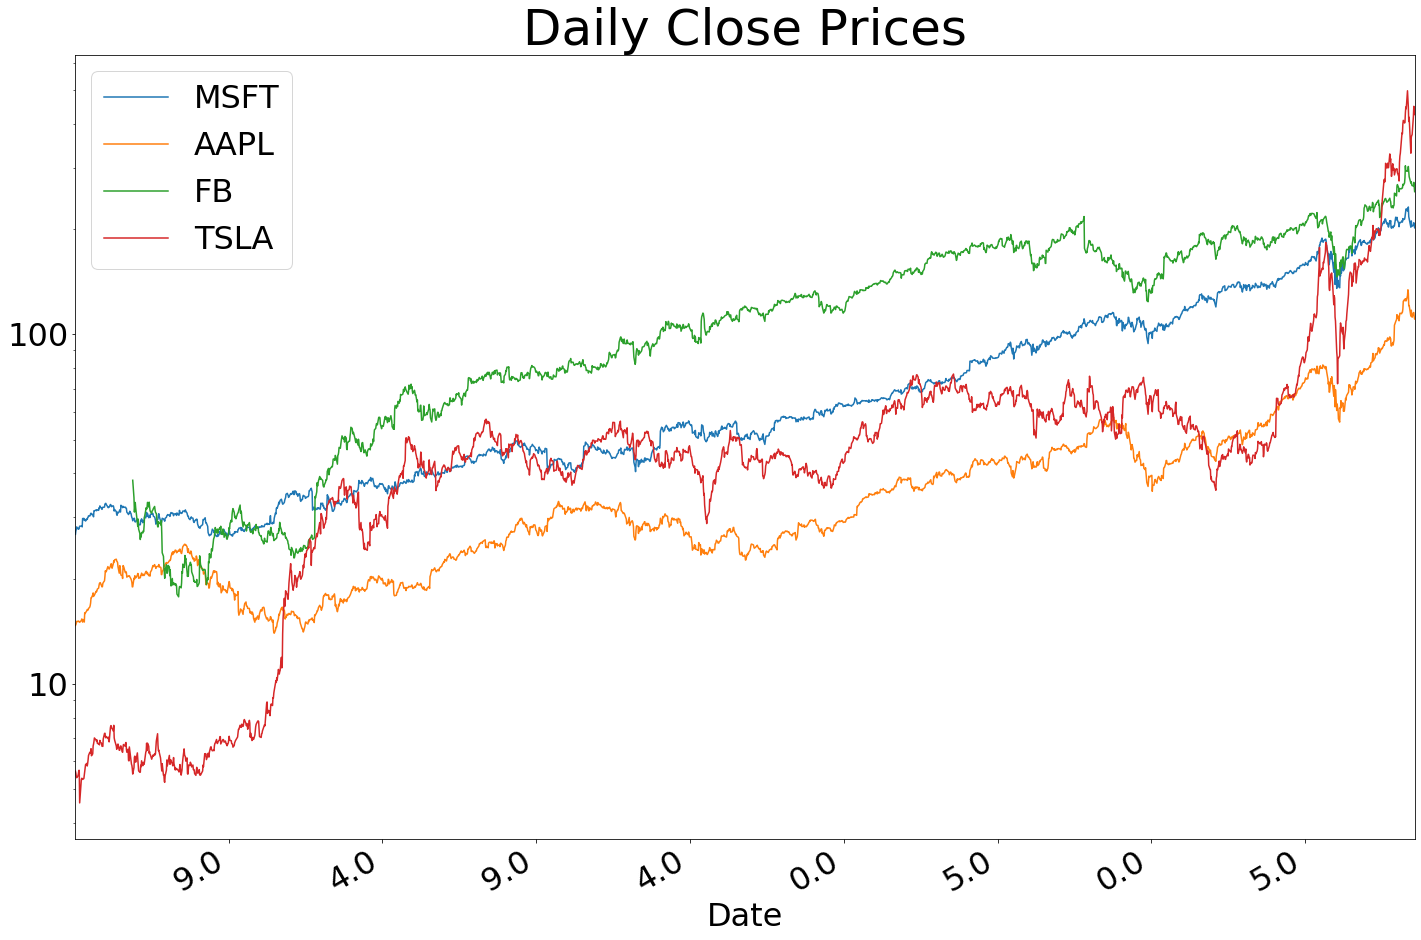

In [35]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({"font.size": 32})

# create a new figure to use for plotting
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

#set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")

# reset y labels to integer from scientific notation
# ax.get_yticks() generates a list of the axis values for the y axis
y_vals = ax.get_yticks()
reformat_values = [int(y) if y >= 1 else round(y,1) for y in y_vals]
# set axis labels with refromat_values instead of existing values
ax.set_yticklabels(reformat_values)

x_vals = ax.get_xticks()
print(x_vals)
reformat_x_values = [str(val)[-3:] for val in x_vals]
ax.set_xticklabels(reformat_x_values)


plt.title("Daily Close Prices", fontsize = 50)
# show visualization
plt.show()
# remove fig, ax by closing
plt.close()